# `convert_to_linked_list` en un BST

El método `convert_to_linked_list` tiene como objetivo transformar un árbol binario de búsqueda (BST) en una lista enlazada ordenada, manteniendo el orden de los elementos. Este proceso se conoce como "**aplanamiento**" (flatten) del árbol y es útil para operaciones que requieren procesamiento secuencial o conversión de estructuras de datos. La idea es realizar un recorrido in-order del BST para asegurar que los elementos estén ordenados en la lista enlazada resultante.

## Implementación en Python

Para realizar esta conversión, primero necesitamos definir una clase básica para los nodos de la lista enlazada, y luego implementar la lógica para convertir el BST en una lista enlazada mediante un recorrido in-order. 

Aquí te muestro cómo implementar este método en la clase [`BST`](src/BST.py): 

In [4]:
# Código utilitario
from src.visualization import visualize_bt
# ver src/BST.py
from src.BST import BST

In [5]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def convert_to_linked_list(self):

    # Función interna para realizar el recorrido in-order del árbol binario
    def in_order_traversal(root):
        # Si el nodo actual es vacío, simplemente regresar
        if not root:
            return None

        # Visitar subárbol izquierdo
        in_order_traversal(root.left)

        # Declarar last_node como nonlocal para poder modificar la variable
        # externa
        nonlocal last_node
        if last_node:
            # Asignar el siguiente nodo en la lista enlazada al dato del nodo
            # actual del árbol
            last_node.next = ListNode(root.data)
            # Mover el apuntador de last_node al nodo que acabamos de insertar
            last_node = last_node.next
        else:
            # Si es el primer nodo, iniciar la lista enlazada y asignar head y
            # last_node
            nonlocal head
            head = ListNode(root.data)
            last_node = head

        # Visitar subárbol derecho
        in_order_traversal(root.right)

    # Inicializar head y last_node a None antes de comenzar el recorrido
    head = None
    last_node = None
    # Empezar el recorrido in-order desde la raíz del árbol
    in_order_traversal(self.root)
    # Regresar la cabeza de la lista enlazada resultante
    return head


# Extender BinaryTree para incluir convert_to_linked_list
BST.convert_to_linked_list = convert_to_linked_list

## Pruebas `convert_to_linked_list`

Para probar `convert_to_linked_list`, primero crearemos un BST, lo convertiremos a una lista enlazada y luego recorreremos la lista enlazada para verificar que los elementos están ordenados correctamente.

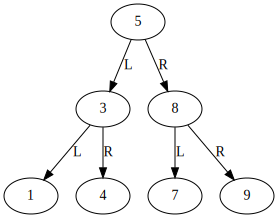

1 -> 3 -> 4 -> 5 -> 7 -> 8 -> 9 -> None


In [6]:
# Crear un BST y añadir elementos
bst = BST()
for key in [5, 3, 8, 1, 4, 7, 9]:
    bst.insert(key)

# Visualizar el árbol
dot = visualize_bt(bst)
display(dot)

# Convertir el BST a una lista enlazada
linked_list_head = bst.convert_to_linked_list()

# Imprimir los elementos de la lista enlazada
current = linked_list_head
while current:
    print(current.value, end=" -> ")
    current = current.next
print("None")

## Complejidad del Algoritmo

La complejidad temporal de `convert_to_linked_list` es O(n), donde n es el número de nodos en el BST, ya que cada nodo se visita exactamente una vez durante el recorrido in-order.

La complejidad espacial es O(h), donde h es la altura del árbol, debido a la profundidad de la pila de llamadas recursivas durante el recorrido in-order. Para un árbol balanceado, esto es O(log n), pero puede llegar a ser O(n) en el peor caso de un árbol degenerado.

## Ejercicios Prácticos

1. Modifica `convert_to_linked_list` para que la lista enlazada resultante sea doblemente enlazada, añadiendo un puntero `prev` a cada nodo de la lista.
2. Implementa la conversión inversa, es decir, convierte una lista enlazada ordenada en un BST equilibrado.

## Soluciones a los Ejercicios

1. Para convertir en una lista doblemente enlazada, necesitarías modificar la clase `ListNode` para incluir un puntero `prev` y ajustar `in_order_traversal` para establecer este puntero al nodo anterior cada vez que proceses un nodo nuevo.

2. Convertir una lista enlazada en un BST equilibrado implica encontrar el elemento medio de la lista para usarlo como raíz del BST, y luego repetir el proceso recursivamente para sub-listas izquierda y derecha para construir los subárboles izquierdo y derecho, respectivamente.